# 8 Discrete Probability Distributions
## 8.2 Binomial Distribution

The following code plots the probability mass function (PMF) of $B_{p,n}$, the binomial distribution with parameters $p$ and $n$. It contains interactive sliders that you can use to vary $n$ over the interval $[0,30]$ and $p$ over the interval $[0, 1]$.

In [1]:
%matplotlib inline

Let us now load the required code and analyze it part by part.

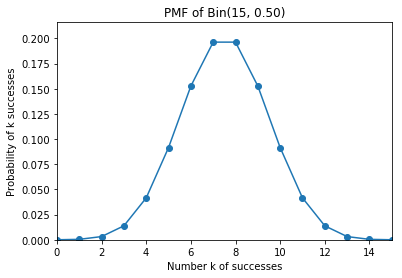

<function __main__.plot_pmf>

In [2]:
# %load plot_pmf.py
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import ipywidgets as widgets


def plot_pmf(n, p):
    '''
    Plot the probability mass function of Binom(n, p)
    '''
    k = np.arange(0, n + 1)
    P_binom = stats.binom.pmf(k, n, p)
    plt.plot(k, P_binom, '-o')
    axes = plt.gca()
    axes.set_xlim([0, n])
    axes.set_ylim([0, 1.1 * max(P_binom)])
    plt.title('PMF of Bin(%i, %.2f)' % (n, p))
    plt.xlabel('Number k of successes')
    plt.ylabel('Probability of k successes')
    plt.show()


widgets.interact(
    plot_pmf,
    n=widgets.IntSlider(min=0, max=30, step=1, value=15),
    p=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5))


First, import the necessary function libraries. Numerical functions from <i> numpy</i>, plotting functions from <i>matplotlib.pyplot</i>, the statistical function <i>binom</i> from <i>scipy.stats</i>, and an interactive slider from <i>ipywidgets</i> to vary $n$ and $p$ in real time.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import ipywidgets as widgets

Next define a function <i>plot_pmf</i> that takes arguments $n$ and $p$ and plots the PMF.

In [4]:
def plot_pmf(n, p):
    '''
    Plot the probability mass function of Binom(n, p).
    '''
    k = np.arange(0, n + 1)
    P_binom = binom.pmf(k, n, p)
    plt.plot(k, P_binom, '-o')
    
    '''
    The snippet below sets the axes limits and
    associated properties of the plot.
    '''
    axes = plt.gca()
    axes.set_xlim([0, n])
    axes.set_ylim([0, 1.1 * max(P_binom)])
    plt.title('PMF of Bin(%i, %.2f)' % (n, p))
    plt.xlabel('Number k of successes ')
    plt.ylabel('Probability of k succcesses')
    plt.show()

Finally, define an interactive slider that enables you to vary $n$ over $[0,30]$ and $p$ over $[0,1]$ and then plot the resulting PMF according to the updated values of both the parameters.

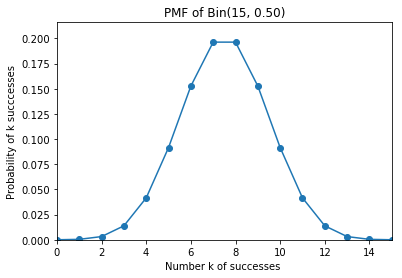

<function __main__.plot_pmf>

In [5]:
widgets.interact(
    plot_pmf,
    n=widgets.IntSlider(min=0, max=30, step=1, value=15),
    p=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5))

## 8.3 Poisson Distribution
### PMF
We follow the same procedure to plot the Poisson PMF.

In [6]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def f(n, λ):
    k = np.arange(0, n+1)
    P_poisson = poisson.pmf(k, λ)
    plt.plot(k, P_poisson, '-o')
    plt.title('PMF of Poisson(%i)' %λ)
    plt.xlabel('Number of Events')
    plt.ylabel('Probability of Number of Events')
    plt.show()
interact(f, n=widgets.IntSlider(min=0, max=50, step=1, value=25), λ=widgets.FloatSlider(min=0, max=30, step=0.1, value=5))

SyntaxError: invalid syntax (<ipython-input-6-3ab728dbb92f>, line 7)

### Poisson Approximation of the Binomial Distribution
Observe how well Poisson$(np)$ approximates Binomial$(n, p)$ for small values of $p$.

In [7]:
from __future__ import print_function
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings("ignore")
e = np.e
def f(n, p, α):
    k = np.arange(0, n+1)
    x = np.linspace(0, n+1, 1000)
    λ = n*p
    stddev = λ**0.5
    P_poisson = poisson.pmf(k, λ)
    P_binom = binom.pmf(k, n, p)
    plt.plot(k, P_poisson, 'r', label = "Poisson(%0.2f)" %λ)
    #plt.title('PMF of Poisson(%i)' %λ)
    #plt.xlabel('Number of Events')
    #plt.ylabel('Probability of Number of Events')
    P_binom_shifted = P_binom 
    fig = plt.gcf()
    fig.set_size_inches(20,10)
    plt.plot(k, P_binom, 'b-', label = "Bin(%i, %0.2f)" %(n,p))
    axes = plt.gca()
    axes.set_xlim([max(0,(1-e**α)*λ),min((1+e**α)*λ,n)])
    if n<10:
        axes.set_xlim([0,n])
    axes.set_ylim([0,1.02*max(max(P_binom_shifted),max(P_poisson))])
    w = e**α
    plt.title('Poisson Approximation of Binomial, |x - μ| < %0.1fσ' %(w), fontsize = 20)
    plt.xlabel('n', fontsize = 20)
    plt.ylabel('y', fontsize = 20)
    plt.legend(fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    print('       %0.3f' %e**α)
    plt.show()
    print("")
    print('|| P_Poisson - P_Binomial ||\u2081 = ',sum(abs(P_poisson-P_binom)))
    print("")
    print("")
    #return e**α
interact(f, n=widgets.IntSlider(min=2, max=2000, step=1, value=15), p=widgets.FloatSlider(min=0.01, max=0.3, step=0.01, value=0.1), α = widgets.FloatSlider(description = 'Range', min=0,max=5,step=0.01, value = 3, readout = False))

SyntaxError: invalid syntax (<ipython-input-7-fd8e9fa824a7>, line 11)

## 8.4 Geometric Distribution
### PMF and CDF

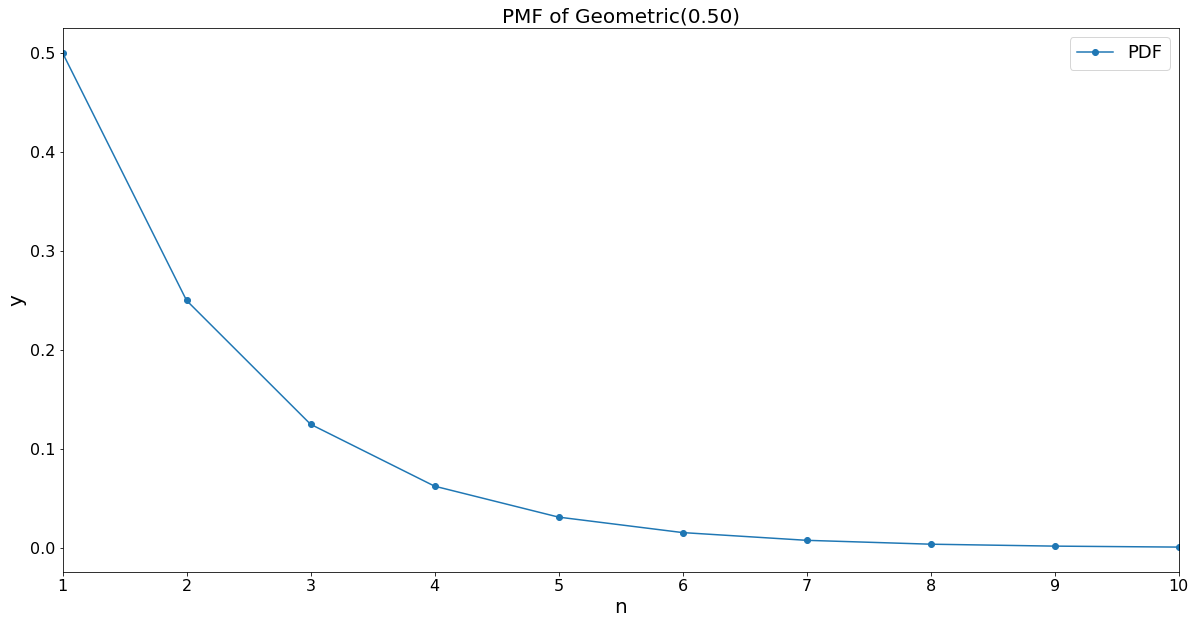

<function __main__.f>

In [8]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings("ignore")


def f(p, n_max, CDF):
    x = np.arange(1, n_max + 1)
    y = [((1 - p)**(z - 1)) * p for z in x]
    z = [(1 - (1 - p)**zz) for zz in x]
    plt.plot(x, y, 'o-', label='PDF')
    if CDF == True:
        plt.plot(x, z, 'ro-', label='CDF')
    #plt.title("Exponential(%.2f)" %λ, fontsize = 20)
    plt.gcf().set_size_inches(20, 10)
    axes = plt.gca().set_xlim([1, n_max])
    if n_max == 1:
        axes = plt.gca().set_xlim([0, 1])
        plt.plot([0, 1], [p, p], 'b')
        plt.xticks([1])
    plt.xlabel('n', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.title('PMF of Geometric(%0.2f)' % p, fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=18)
    plt.show()


interact(
    f,
    p=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5),
    n_max=widgets.IntSlider(min=1, max=1000, step=1, value=10),
    CDF=widgets.ToggleButton(False))
